<a href="https://colab.research.google.com/github/hardik4555/stibo-final-s-clustering-/blob/main/stibo_finals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries and Data**

In [ ]:
import pandas as pd
raw_data=pd.read_json('convertjson.json')
from pandas import json_normalize
raw_data


,STEP-ProductInformation
AttributeList,"{'Attribute': [{'Name': 'Screwdriver bit', 'Li..."
ListOfValuesGroupList,{'ListOfValuesGroup': [{'Name': 'Lists of Valu...
ListsOfValues,"{'ListOfValue': [{'Name': 'Seals material', 'V..."
Products,{'Product': [{'Name': 'LR2000 2000W 230V Power...
_ContextID,Context1
_ExportContext,Context1
_ExportTime,2024-01-08 13:32:56
_UseContextLocale,false
_WorkspaceID,Main


# **Removing unnecessary row's**

In [ ]:
df = pd.DataFrame(raw_data)
df=df.drop(['ListOfValuesGroupList', 'ListsOfValues','_ContextID','_ExportContext', '_ExportTime','_UseContextLocale', '_WorkspaceID' ])
df



,STEP-ProductInformation
AttributeList,"{'Attribute': [{'Name': 'Screwdriver bit', 'Li..."
Products,{'Product': [{'Name': 'LR2000 2000W 230V Power...


In [ ]:
products_dict=df['STEP-ProductInformation']['Products']
products_dict

{'Product': [{'Name': 'LR2000 2000W 230V Power Conditioner with Automatic Voltage Regulation (AVR), AC Surge Protection, 6 Outlets, UNIPLUGINT Adapter',
   'Values': {'Value': [{'_AttributeID': 'IceCat_Attrib_22658',
      '_UnitID': 'IceCat_Unit_24',
      '__text': '444.5'},
     {'_AttributeID': 'IceCat_Attrib_19016',
      '_UnitID': 'IceCat_Unit_38',
      '__text': '24990'},
     {'_AttributeID': 'IceCat_Attrib_762',
      '_UnitID': 'IceCat_Unit_38',
      '__text': '6030'},
     {'_AttributeID': 'IceCat_Attrib_16240',
      '_UnitID': 'IceCat_Unit_81',
      '__text': '1200'},
     {'_AttributeID': 'IceCat_Attrib_23056', '__text': '10037332040289'},
     {'_AttributeID': 'IceCat_Attrib_3808',
      '_UnitID': 'IceCat_Unit_24',
      '__text': '215.9'},
     {'_AttributeID': 'IceCat_Attrib_3806',
      '_UnitID': 'IceCat_Unit_24',
      '__text': '259.1'},
     {'_AttributeID': 'IceCat_Attrib_5932',
      '_UnitID': 'IceCat_Unit_44',
      '__text': '2000'},
     {'_AttributeID'

# **Flattening the JSON inside the dict**

**For products**

In [ ]:
products_dict = df['STEP-ProductInformation']['Products']

# Flatten the 'Products' dictionary using pd.json_normalize
products_df = pd.json_normalize(products_dict['Product'])

# Display the flattened DataFrame
products_df


,Name,_ID,_UserTypeID,Values.Value,Values.MultiValue,ClassificationCrossReference,ClassificationReference
0,LR2000 2000W 230V Power Conditioner with Autom...,IceCat_Prod_1668262,IceCat_Product,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Y'], '_AttributeID': 'IceCat_Attr...",NaN,NaN
1,1200W 120V Power Conditioner with Automatic Vo...,IceCat_Prod_1668268,IceCat_Product,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Plastic'], '_AttributeID': 'IceCa...",NaN,NaN
2,600W 120V Power Conditioner with Automatic Vol...,IceCat_Prod_2273759,IceCat_Product,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...",[{'Value': ['Acrylonitrile butadiene styrene (...,NaN,NaN
3,Isobar 2-Outlet Low-Profile Professional Audio...,IceCat_Prod_6291127,IceCat_Product,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['China'], '_AttributeID': 'IceCat_...",NaN,NaN
4,2400W 120V Power Conditioner with Automatic Vo...,IceCat_Prod_2273755,IceCat_Product,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Y'], '_AttributeID': 'IceCat_Attr...",NaN,NaN
...,...,...,...,...,...,...,...
12181,Fugen Neu Express,IceCat_Prod_55183541,IceCat_Product,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...",NaN,NaN
12182,Fliesen Fix,IceCat_Prod_55183495,IceCat_Product,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom'], '_AttributeID': 'IceC...",NaN,NaN
12183,Voeg en tegelrand reparatie,IceCat_Prod_58809959,IceCat_Product,"[{'_AttributeID': 'IceCat_Attrib_13591', '__te...",NaN,NaN,NaN
12184,Voeg en tegelrand reparatie,IceCat_Prod_58809962,IceCat_Product,"[{'_AttributeID': 'IceCat_Attrib_13591', '__te...",NaN,NaN,NaN


**For attributes**

In [ ]:
Attribute_dict = df['STEP-ProductInformation']['AttributeList']

# Flatten the 'Attributes' dictionary using pd.json_normalize
Attribute_df = pd.json_normalize(Attribute_dict['Attribute'])

# Display the flattened DataFrame
Attribute_df

,Name,UserTypeLink,_ID,_MultiValued,_ProductMode,_FullTextIndexed,_ExternallyMaintained,_Derived,_HierarchicalFiltering,_ClassificationHierarchicalFiltering,...,Validation._MinValue,Validation._MaxValue,Validation._MaxLength,Validation._InputMask,AttributeGroupLink,LinkType,DimensionLink._DimensionID,ValueTemplate,ValueFilter.Value,MetaData.MultiValue
0,Screwdriver bit,[{'_UserTypeID': 'IceCat_Product'}],IceCat_Attrib_6786,false,Normal,false,false,false,false,false,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chemical flux-resistant,[{'_UserTypeID': 'IceCat_Product'}],IceCat_Attrib_40910,false,Normal,false,false,false,false,false,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Impact energy (max),[{'_UserTypeID': 'IceCat_Product'}],IceCat_Attrib_6782,false,Normal,false,false,false,NaN,NaN,...,,,,,NaN,NaN,NaN,NaN,NaN,NaN
3,Idle speed (1st gear),[{'_UserTypeID': 'IceCat_Product'}],IceCat_Attrib_6787,false,Normal,false,false,false,NaN,NaN,...,,,,,NaN,NaN,NaN,NaN,NaN,NaN
4,Handguard,[{'_UserTypeID': 'IceCat_Product'}],IceCat_Attrib_27423,false,Normal,false,false,false,false,false,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,Colour name,[{'_UserTypeID': 'IceCat_Product'}],IceCat_Attrib_17956,false,Normal,false,false,false,NaN,NaN,...,,,,,NaN,NaN,NaN,NaN,NaN,NaN
4582,AC input frequency,[{'_UserTypeID': 'IceCat_Product'}],IceCat_Attrib_8484,false,Normal,false,false,false,NaN,NaN,...,,,,,NaN,NaN,NaN,NaN,NaN,NaN
4583,Number of frames,[{'_UserTypeID': 'IceCat_Product'}],IceCat_Attrib_9170,false,Normal,false,false,false,NaN,NaN,...,,,,,NaN,NaN,NaN,NaN,NaN,NaN
4584,Number of accessories included,[{'_UserTypeID': 'IceCat_Product'}],IceCat_Attrib_29632,false,Normal,false,false,false,NaN,NaN,...,,,,,NaN,NaN,NaN,NaN,NaN,NaN


# **Creating a mapping of AttributeID with Attribute name**

In [ ]:
new_array = Attribute_df[['_ID', 'Name']].values
new_df = pd.DataFrame(new_array, columns=['ID', 'Name'])
new_df

,ID,Name
0,IceCat_Attrib_6786,Screwdriver bit
1,IceCat_Attrib_40910,Chemical flux-resistant
2,IceCat_Attrib_6782,Impact energy (max)
3,IceCat_Attrib_6787,Idle speed (1st gear)
4,IceCat_Attrib_27423,Handguard
...,...,...
4581,IceCat_Attrib_17956,Colour name
4582,IceCat_Attrib_8484,AC input frequency
4583,IceCat_Attrib_9170,Number of frames
4584,IceCat_Attrib_29632,Number of accessories included


In [ ]:
sorted_df = new_df.sort_values(by='ID')
sorted_df

,ID,Name
4104,10167,Compliance
1867,4875,Attribute Description
1836,4941,Unit Description
3294,ATR_Publishing_Display_Name,Publishing Display Name
3100,ATR_Publishing_Header_Information,Publishing Header Information
...,...,...
1928,eClassAdv_DependsOn,eClass Advanced Depends On
2045,eClassAdv_Description,eClass Advanced Description
1978,eClassAdv_IRDI,eClass Advanced IRDI
1930,eClassAdv_PropertyDomainType,eClass Advanced Property Domain Type


**Map Attribute's ID with there name**

In [ ]:
id_to_name_mapping = sorted_df.set_index('ID')['Name'].to_dict()
id_to_name_mapping

{'10167': 'Compliance',
 '4875': 'Attribute Description',
 '4941': 'Unit Description',
 'ATR_Publishing_Display_Name': 'Publishing Display Name',
 'ATR_Publishing_Header_Information': 'Publishing Header Information',
 'AT_AIAC_classification_type': 'Classification Type',
 'AT_AIAC_prediction_confidence': 'Confidence',
 'AT_AIAC_product_description': 'AIAC Description',
 'AT_AttributeDisplaySequence': 'Attr. DS',
 'AT_AttributeDisplaySequenceComplete': 'Attr. DS Complete',
 'AT_AttributeDisplaySequenceFix': 'Attr. DS Fix',
 'AT_AttributeDisplaySequencePivot': 'Attr. DS Pivot',
 'AT_AttributeDisplaySequenceTMP': 'Attr. DS (TMP)',
 'AT_AttributeDisplaySequenceTagglo': 'Attribute display sequence tagglo',
 'AT_AttributeDisplaySequenceTechData': 'Attr. DS TechData',
 'AT_AttributeMandatoryTagglo': 'Attribute mandatory tagglo',
 'AT_AttributeSequencePicto': 'Attr. DS Picto',
 'AT_AttributeShortCut': 'Attr. Abbreviation',
 'AT_AttributeShortName': 'Attribute Short Name',
 'AT_AttributeStyleNa

# **Further pre-processing**

**removing NaN row's (as less than 5-6%)**

In [ ]:
cluster_data = products_df[['Name', 'Values.Value', 'Values.MultiValue']]
cluster_data=cluster_data.dropna()
preserved_data=cluster_data #for further reference
cluster_data

,Name,Values.Value,Values.MultiValue
0,LR2000 2000W 230V Power Conditioner with Autom...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Y'], '_AttributeID': 'IceCat_Attr..."
1,1200W 120V Power Conditioner with Automatic Vo...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Plastic'], '_AttributeID': 'IceCa..."
2,600W 120V Power Conditioner with Automatic Vol...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...",[{'Value': ['Acrylonitrile butadiene styrene (...
3,Isobar 2-Outlet Low-Profile Professional Audio...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['China'], '_AttributeID': 'IceCat_..."
4,2400W 120V Power Conditioner with Automatic Vo...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Y'], '_AttributeID': 'IceCat_Attr..."
...,...,...,...
12179,Fliesen Fix,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom'], '_AttributeID': 'IceC..."
12180,Fugen Versiegelung,"[{'_AttributeID': 'IceCat_Attrib_13591', '__te...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut..."
12181,Fugen Neu Express,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut..."
12182,Fliesen Fix,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom'], '_AttributeID': 'IceC..."


In [ ]:
nan_count = cluster_data.isna().sum()
nan_count

Name                 0
Values.Value         0
Values.MultiValue    0
dtype: int64

**combining Values.values and Multivalues.values into a new attribute's column**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

cluster_data['Values.Value'] = cluster_data['Values.Value'].apply(lambda x: [x] if not isinstance(x, list) else x)
cluster_data['Values.MultiValue'] = cluster_data['Values.MultiValue'].apply(lambda x: [x] if not isinstance(x, list) else x)
# Combine 'Values.Value' and 'Values.MultiValue' columns into a new column 'Attributes'
cluster_data['Attributes'] = cluster_data.apply(lambda row: row['Values.Value'] + row['Values.MultiValue'], axis=1)

cluster_data



,Name,Values.Value,Values.MultiValue,Attributes
0,LR2000 2000W 230V Power Conditioner with Autom...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Y'], '_AttributeID': 'IceCat_Attr...","[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
1,1200W 120V Power Conditioner with Automatic Vo...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Plastic'], '_AttributeID': 'IceCa...","[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
2,600W 120V Power Conditioner with Automatic Vol...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...",[{'Value': ['Acrylonitrile butadiene styrene (...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
3,Isobar 2-Outlet Low-Profile Professional Audio...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['China'], '_AttributeID': 'IceCat_...","[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
4,2400W 120V Power Conditioner with Automatic Vo...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Y'], '_AttributeID': 'IceCat_Attr...","[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
...,...,...,...,...
12179,Fliesen Fix,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom'], '_AttributeID': 'IceC...","[{'_AttributeID': 'IceCat_Attrib_1675', '__tex..."
12180,Fugen Versiegelung,"[{'_AttributeID': 'IceCat_Attrib_13591', '__te...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'IceCat_Attrib_13591', '__te..."
12181,Fugen Neu Express,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'IceCat_Attrib_1675', '__tex..."
12182,Fliesen Fix,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom'], '_AttributeID': 'IceC...","[{'_AttributeID': 'IceCat_Attrib_1675', '__tex..."


In [ ]:
cluster_data['Values.Value'][0]

[{'_AttributeID': 'IceCat_Attrib_22658',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '444.5'},
 {'_AttributeID': 'IceCat_Attrib_19016',
  '_UnitID': 'IceCat_Unit_38',
  '__text': '24990'},
 {'_AttributeID': 'IceCat_Attrib_762',
  '_UnitID': 'IceCat_Unit_38',
  '__text': '6030'},
 {'_AttributeID': 'IceCat_Attrib_16240',
  '_UnitID': 'IceCat_Unit_81',
  '__text': '1200'},
 {'_AttributeID': 'IceCat_Attrib_23056', '__text': '10037332040289'},
 {'_AttributeID': 'IceCat_Attrib_3808',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '215.9'},
 {'_AttributeID': 'IceCat_Attrib_3806',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '259.1'},
 {'_AttributeID': 'IceCat_Attrib_5932',
  '_UnitID': 'IceCat_Unit_44',
  '__text': '2000'},
 {'_AttributeID': 'IceCat_Attrib_2556',
  '_UnitID': 'IceCat_Unit_384',
  '__text': '6'},
 {'_AttributeID': 'IceCat_Attrib_3807',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '203.2'},
 {'_AttributeID': 'IceCat_Attrib_1464',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '177.8'},
 {'_

In [ ]:
cluster_data['Values.MultiValue'][0]

[{'Value': ['Y'], '_AttributeID': 'IceCat_Attrib_1501'},
 {'Value': ['Taiwan'], '_AttributeID': 'IceCat_Attrib_3294'},
 {'Value': ['RoHS'], '_AttributeID': 'IceCat_Attrib_42513'},
 {'Value': ['Polycarbonate (PC)'], '_AttributeID': 'IceCat_Attrib_5214'},
 {'Value': ['Black'], '_AttributeID': 'IceCat_Attrib_1766'}]

In [ ]:
cluster_data['Attributes'][0]

[{'_AttributeID': 'IceCat_Attrib_22658',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '444.5'},
 {'_AttributeID': 'IceCat_Attrib_19016',
  '_UnitID': 'IceCat_Unit_38',
  '__text': '24990'},
 {'_AttributeID': 'IceCat_Attrib_762',
  '_UnitID': 'IceCat_Unit_38',
  '__text': '6030'},
 {'_AttributeID': 'IceCat_Attrib_16240',
  '_UnitID': 'IceCat_Unit_81',
  '__text': '1200'},
 {'_AttributeID': 'IceCat_Attrib_23056', '__text': '10037332040289'},
 {'_AttributeID': 'IceCat_Attrib_3808',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '215.9'},
 {'_AttributeID': 'IceCat_Attrib_3806',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '259.1'},
 {'_AttributeID': 'IceCat_Attrib_5932',
  '_UnitID': 'IceCat_Unit_44',
  '__text': '2000'},
 {'_AttributeID': 'IceCat_Attrib_2556',
  '_UnitID': 'IceCat_Unit_384',
  '__text': '6'},
 {'_AttributeID': 'IceCat_Attrib_3807',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '203.2'},
 {'_AttributeID': 'IceCat_Attrib_1464',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '177.8'},
 {'_

# **Replacing Attribute's ID with their name**

In [ ]:
# Function to ensure that each element in the column is a list of dictionaries
def clean_attributes(attribute_list):
    if isinstance(attribute_list, list):
        return attribute_list
    else:
        return []

# Apply the cleaning function to the 'Attributes' column to ensure all elements are lists of dictionaries
cluster_data['Attributes'] = cluster_data['Attributes'].apply(clean_attributes)
cluster_data

,Name,Values.Value,Values.MultiValue,Attributes
0,LR2000 2000W 230V Power Conditioner with Autom...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Y'], '_AttributeID': 'IceCat_Attr...","[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
1,1200W 120V Power Conditioner with Automatic Vo...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Plastic'], '_AttributeID': 'IceCa...","[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
2,600W 120V Power Conditioner with Automatic Vol...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...",[{'Value': ['Acrylonitrile butadiene styrene (...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
3,Isobar 2-Outlet Low-Profile Professional Audio...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['China'], '_AttributeID': 'IceCat_...","[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
4,2400W 120V Power Conditioner with Automatic Vo...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Y'], '_AttributeID': 'IceCat_Attr...","[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
...,...,...,...,...
12179,Fliesen Fix,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom'], '_AttributeID': 'IceC...","[{'_AttributeID': 'IceCat_Attrib_1675', '__tex..."
12180,Fugen Versiegelung,"[{'_AttributeID': 'IceCat_Attrib_13591', '__te...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'IceCat_Attrib_13591', '__te..."
12181,Fugen Neu Express,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'IceCat_Attrib_1675', '__tex..."
12182,Fliesen Fix,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom'], '_AttributeID': 'IceC...","[{'_AttributeID': 'IceCat_Attrib_1675', '__tex..."


In [ ]:
# Function to map _AttributeID values
def map_attribute_id(attribute_list):
    if isinstance(attribute_list, list):
        for d in attribute_list:
            if isinstance(d, dict) and '_AttributeID' in d:
                d['_AttributeID'] = id_to_name_mapping.get(d['_AttributeID'], d['_AttributeID'])
    return attribute_list

# Apply the mapping function to each row in the 'Attributes' column
cluster_data['Attributes'] = cluster_data['Attributes'].apply(map_attribute_id)

cluster_data['Attributes']

0        [{'_AttributeID': 'Master (outer) case length'...
1        [{'_AttributeID': 'Master (outer) case length'...
2        [{'_AttributeID': 'Master (outer) case length'...
3        [{'_AttributeID': 'Master (outer) case length'...
4        [{'_AttributeID': 'Master (outer) case length'...
                               ...                        
12179    [{'_AttributeID': 'Quantity', '__text': '1'}, ...
12180    [{'_AttributeID': 'Suitable for outdoor use', ...
12181    [{'_AttributeID': 'Quantity', '__text': '1'}, ...
12182    [{'_AttributeID': 'Quantity', '__text': '1'}, ...
12185    [{'_AttributeID': 'Suitable for outdoor use', ...
Name: Attributes, Length: 11430, dtype: object

In [ ]:
cluster_data['Attributes'][0]

[{'_AttributeID': 'Master (outer) case length',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '444.5'},
 {'_AttributeID': 'Master (outer) case gross weight',
  '_UnitID': 'IceCat_Unit_38',
  '__text': '24990'},
 {'_AttributeID': 'Package weight',
  '_UnitID': 'IceCat_Unit_38',
  '__text': '6030'},
 {'_AttributeID': 'UPS AC suppression rating',
  '_UnitID': 'IceCat_Unit_81',
  '__text': '1200'},
 {'_AttributeID': 'Master (outer) case GTIN (EAN/UPC)',
  '__text': '10037332040289'},
 {'_AttributeID': 'Package width',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '215.9'},
 {'_AttributeID': 'Package depth',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '259.1'},
 {'_AttributeID': 'Output power',
  '_UnitID': 'IceCat_Unit_44',
  '__text': '2000'},
 {'_AttributeID': 'AC outlets quantity',
  '_UnitID': 'IceCat_Unit_384',
  '__text': '6'},
 {'_AttributeID': 'Package height',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '203.2'},
 {'_AttributeID': 'Height', '_UnitID': 'IceCat_Unit_24', '__text': '177.8'},

In [ ]:
print(type(cluster_data['Attributes'][0]))

<class 'list'>


# **Making a new column containing list of attribute name's**

In [ ]:
# 1. Traverse the 'Attributes' column
final_column = []
for row in cluster_data['Attributes']:
    if isinstance(row, list) and all(isinstance(attr, dict) for attr in row):
        # If 'row' is a list of dictionaries
        # 2. Extract '_AttributeID' values from each dictionary
        attribute_ids = [attr['_AttributeID'] for attr in row]
        # 3. Append the list of '_AttributeID' values into a nested list
        final_column.append(attribute_ids)
    else:
        # If 'row' is not a list of dictionaries (e.g., float), append None to 'new_column'
        final_column.append(None)

# 4. Add the nested list as a new column in cluster_data
cluster_data['final_column'] = final_column

# Display the updated cluster_data
cluster_data['final_column']



0        [Master (outer) case length, Master (outer) ca...
1        [Master (outer) case length, Master (outer) ca...
2        [Master (outer) case length, Master (outer) ca...
3        [Master (outer) case length, Master (outer) ca...
4        [Master (outer) case length, Master (outer) ca...
                               ...                        
12179    [Quantity, Drying time, Suitable for indoor us...
12180    [Suitable for outdoor use, Quantity, Drying ti...
12181    [Quantity, Drying time, Suitable for indoor us...
12182    [Quantity, Drying time, Suitable for indoor us...
12185    [Suitable for outdoor use, Package height, Dry...
Name: final_column, Length: 11430, dtype: object

In [ ]:
num_none_values = cluster_data['final_column'].isna().sum()
num_none_values

0

In [ ]:
column_name = 'final_column'

cluster_data = cluster_data.dropna(subset=[column_name])
cluster_data

,Name,Values.Value,Values.MultiValue,Attributes,final_column
0,LR2000 2000W 230V Power Conditioner with Autom...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['Y'], '_AttributeID': 'LED indicat...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca..."
1,1200W 120V Power Conditioner with Automatic Vo...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['Plastic'], '_AttributeID': 'Housi...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca..."
2,600W 120V Power Conditioner with Automatic Vol...,[{'_AttributeID': 'Master (outer) case length'...,[{'Value': ['Acrylonitrile butadiene styrene (...,[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca..."
3,Isobar 2-Outlet Low-Profile Professional Audio...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['China'], '_AttributeID': 'Country...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca..."
4,2400W 120V Power Conditioner with Automatic Vo...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['Y'], '_AttributeID': 'LED indicat...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca..."
...,...,...,...,...,...
12179,Fliesen Fix,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom'], '_AttributeID': 'Suit...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us..."
12180,Fugen Versiegelung,"[{'_AttributeID': 'Suitable for outdoor use', ...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'Suitable for outdoor use', ...","[Suitable for outdoor use, Quantity, Drying ti..."
12181,Fugen Neu Express,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us..."
12182,Fliesen Fix,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom'], '_AttributeID': 'Suit...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us..."


# **Using Tf-Idf**

**converting each element of attribute column's into string**

In [ ]:
cluster_data['tf-idf column'] = cluster_data['final_column'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


**forming tf-idf matrix**

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cluster_data['tf-idf column'])

print(X)

  (0, 165)	0.02229666261579782
  (0, 600)	0.023351023527290186
  (0, 470)	0.05414396833253917
  (0, 377)	0.07767200411057809
  (0, 135)	0.08223092335900567
  (0, 754)	0.08223092335900567
  (0, 533)	0.09379505196360373
  (0, 514)	0.032599977078239674
  (0, 204)	0.09379505196360373
  (0, 398)	0.08914458692805144
  (0, 440)	0.08876467895682678
  (0, 220)	0.020894362786532675
  (0, 39)	0.020894362786532675
  (0, 564)	0.042636607179979524
  (0, 601)	0.04766048720744415
  (0, 197)	0.15574057274991182
  (0, 366)	0.09675249083347173
  (0, 611)	0.0374408193281839
  (0, 539)	0.06809514512358897
  (0, 592)	0.07177902008513877
  (0, 541)	0.0871357222259613
  (0, 219)	0.06598179927307612
  (0, 855)	0.092367398051475
  (0, 820)	0.09185264791641212
  (0, 264)	0.0919072737325888
  :	:
  (11428, 39)	0.05559300904495793
  (11428, 611)	0.09961767338049414
  (11428, 549)	0.0978010228441145
  (11429, 496)	0.18102180298767934
  (11429, 626)	0.1849840380016812
  (11429, 258)	0.18486413234914387
  (11429, 507

# **Applying SVD to reduce dimensionality**

In [ ]:
# Apply TruncatedSVD to reduce dimensionality
svd = TruncatedSVD(n_components=150) #Taking 150 column's
X_svd = svd.fit_transform(X)
X_svd


array([[ 1.46888397e-01,  2.43175958e-01,  4.78045301e-01, ...,
        -2.80267174e-03,  1.02579864e-03, -5.54724461e-03],
       [ 1.52411748e-01,  2.56398483e-01,  4.79111338e-01, ...,
        -3.10462393e-03,  1.93446090e-03, -2.46114904e-03],
       [ 1.53740157e-01,  2.71108113e-01,  4.88192775e-01, ...,
        -3.55251374e-03,  8.15412209e-04, -2.83368358e-03],
       ...,
       [ 3.53702297e-01, -2.38336155e-02, -1.85154260e-01, ...,
        -4.39885768e-04,  9.97974489e-03, -3.31373584e-03],
       [ 5.11610807e-01, -1.38947357e-02, -2.31950362e-01, ...,
         6.34148605e-03, -5.70293489e-03, -3.28888956e-03],
       [ 6.42088578e-01, -3.33898683e-02,  6.22674144e-03, ...,
         1.72783803e-02, -2.87019023e-02, -1.14185753e-02]])

# **Checking optimal value of K using elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

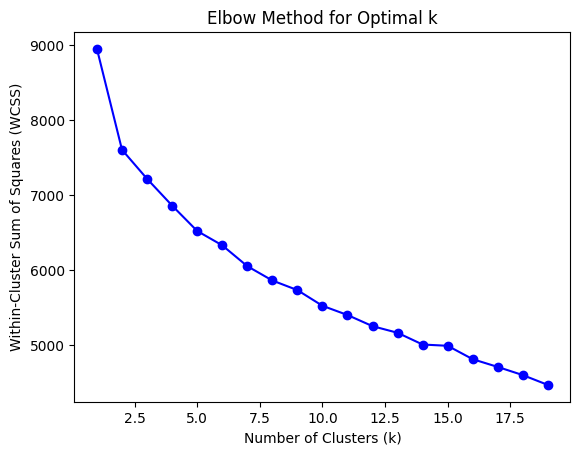

In [ ]:

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_svd)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to determine the optimal number of clusters
plt.plot(range(1, 20), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()



# **Fitting the Model**

In [ ]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels=kmeans.fit_predict(X_svd)
cluster_data['Cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Clusters on basis of similar attributes names**

                                                    Name  Cluster
0      LR2000 2000W 230V Power Conditioner with Autom...        3
1      1200W 120V Power Conditioner with Automatic Vo...        3
2      600W 120V Power Conditioner with Automatic Vol...        3
3      Isobar 2-Outlet Low-Profile Professional Audio...        3
4      2400W 120V Power Conditioner with Automatic Vo...        3
...                                                  ...      ...
12179                                        Fliesen Fix        0
12180                                 Fugen Versiegelung        0
12181                                  Fugen Neu Express        0
12182                                        Fliesen Fix        0
12185                                         Voegenfris        0

[11430 rows x 2 columns]


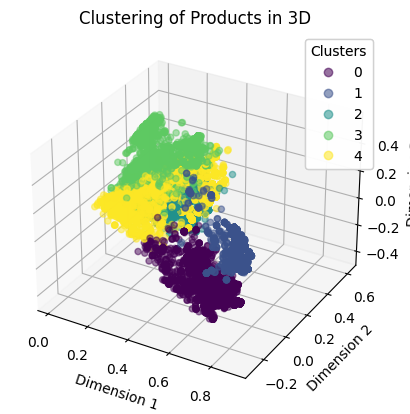

In [ ]:
# Display the resulting clusters
print(cluster_data[['Name', 'Cluster']])


from mpl_toolkits.mplot3d import Axes3D

# Assuming X_svd has 3 dimensions after TruncatedSVD
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2], c=cluster_data['Cluster'], cmap='viridis', alpha=0.5)

# Legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Set labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('Clustering of Products in 3D')

plt.show()


In [ ]:
cluster_data

,Name,Values.Value,Values.MultiValue,Attributes,final_column,tf-idf column,Cluster
0,LR2000 2000W 230V Power Conditioner with Autom...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['Y'], '_AttributeID': 'LED indicat...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca...",Master (outer) case length Master (outer) case...,3
1,1200W 120V Power Conditioner with Automatic Vo...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['Plastic'], '_AttributeID': 'Housi...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca...",Master (outer) case length Master (outer) case...,3
2,600W 120V Power Conditioner with Automatic Vol...,[{'_AttributeID': 'Master (outer) case length'...,[{'Value': ['Acrylonitrile butadiene styrene (...,[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca...",Master (outer) case length Master (outer) case...,3
3,Isobar 2-Outlet Low-Profile Professional Audio...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['China'], '_AttributeID': 'Country...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca...",Master (outer) case length Master (outer) case...,3
4,2400W 120V Power Conditioner with Automatic Vo...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['Y'], '_AttributeID': 'LED indicat...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca...",Master (outer) case length Master (outer) case...,3
...,...,...,...,...,...,...,...
12179,Fliesen Fix,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom'], '_AttributeID': 'Suit...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us...",Quantity Drying time Suitable for indoor use S...,0
12180,Fugen Versiegelung,"[{'_AttributeID': 'Suitable for outdoor use', ...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'Suitable for outdoor use', ...","[Suitable for outdoor use, Quantity, Drying ti...",Suitable for outdoor use Quantity Drying time ...,0
12181,Fugen Neu Express,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us...",Quantity Drying time Suitable for indoor use S...,0
12182,Fliesen Fix,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom'], '_AttributeID': 'Suit...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us...",Quantity Drying time Suitable for indoor use S...,0


In [ ]:
num_unique_rows = cluster_data['final_column'].drop_duplicates().shape[0]

# Display the number of unique rows
print("Number of unique rows in the DataFrame:", num_unique_rows)

Number of unique rows in the DataFrame: 3779


In [ ]:
cluster_counts = cluster_data['Cluster'].value_counts()

print("Number of elements in each cluster:")
cluster_counts

Number of elements in each cluster:


4    3598
0    2750
3    2261
1    1583
2    1238
Name: Cluster, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_svd, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.13287966227302872


# **Saving information of each cluster in a different CSV file**

In [ ]:
for i in range(5):
  c=cluster_data[cluster_data['Cluster']==i]
  c.to_csv('/content/drive/MyDrive/database_analysis/'+'cluster_'+str(i)+'.csv')

# **Part 2**

In [ ]:
csv0=pd.read_csv('/content/drive/MyDrive/database_analysis/cluster_0.csv')
csv0

,Unnamed: 0,Name,Values.Value,Values.MultiValue,Attributes,final_column,tf-idf column,Cluster
0,6549,Kit&Sticker verwijderaar,"[{'_AttributeID': 'Package height', '_UnitID':...","[{'Value': ['Brush', 'Putty knife'], '_Attribu...","[{'_AttributeID': 'Package height', '_UnitID':...","['Package height', 'HSE note', 'Minimum operat...",Package height HSE note Minimum operating temp...,0
1,6593,SW2SC150,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Aluminium'], '_AttributeID': 'Mat...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","['Quantity', 'Suitable for indoor use', 'Easy ...",Quantity Suitable for indoor use Easy to use M...,0
2,6596,7000116655,"[{'_AttributeID': 'Suitable for outdoor use', ...","[{'Value': ['Transparent'], '_AttributeID': 'T...","[{'_AttributeID': 'Suitable for outdoor use', ...","['Suitable for outdoor use', 'Quantity', 'Thic...",Suitable for outdoor use Quantity Thickness Ea...,0
3,6599,7000029006,"[{'_AttributeID': 'Moisture-resistant', '__tex...","[{'Value': ['Moisture resistant'], '_Attribute...","[{'_AttributeID': 'Moisture-resistant', '__tex...","['Moisture-resistant', 'Quantity', 'Suitable f...",Moisture-resistant Quantity Suitable for outdo...,0
4,6604,7000116641,"[{'_AttributeID': 'Suitable for outdoor use', ...","[{'Value': ['Transparent'], '_AttributeID': 'T...","[{'_AttributeID': 'Suitable for outdoor use', ...","['Suitable for outdoor use', 'Quantity', 'Thic...",Suitable for outdoor use Quantity Thickness Su...,0
...,...,...,...,...,...,...,...,...
2745,12179,Fliesen Fix,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom'], '_AttributeID': 'Suit...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","['Quantity', 'Drying time', 'Suitable for indo...",Quantity Drying time Suitable for indoor use S...,0
2746,12180,Fugen Versiegelung,"[{'_AttributeID': 'Suitable for outdoor use', ...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'Suitable for outdoor use', ...","['Suitable for outdoor use', 'Quantity', 'Dryi...",Suitable for outdoor use Quantity Drying time ...,0
2747,12181,Fugen Neu Express,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","['Quantity', 'Drying time', 'Suitable for indo...",Quantity Drying time Suitable for indoor use S...,0
2748,12182,Fliesen Fix,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom'], '_AttributeID': 'Suit...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","['Quantity', 'Drying time', 'Suitable for indo...",Quantity Drying time Suitable for indoor use S...,0


In [ ]:
csv0['final_column'][100]

"['Suitable for outdoor use', 'Suitable for indoor use', 'Weatherproof', 'Application temperature (min)', 'Density', 'Application temperature (max)', 'Volume', 'Quantity per pack', 'Minimum drying time', 'AIAC Description', 'Application methods', 'Not suitable for materials', 'Colour of substance']"

In [ ]:
csv0['final_column'][160]

"['Drying time', 'Suitable for indoor use', 'Surface preparation', 'Package depth', 'Operating time', 'How to store', 'Volume', 'Volatile organic compounds (VOC) content', 'HSE note', 'Package width', 'Colour name', 'Number of coats note', 'Suitable for outdoor use', 'Package height', 'Dilution note', 'Depth of fill (max)', 'Application temperature (min)', 'Application temperature (max)', 'Density', 'Recoat after', 'AIAC Description', 'Required tools', 'Suitable location', 'Suitable for materials', 'Filler type', 'Volatile organic compounds (VOC) content labelling system']"

In [ ]:
csv0['Attributes'][0]

"[{'_AttributeID': 'Package height', '_UnitID': 'IceCat_Unit_24', '__text': '158'}, {'_AttributeID': 'HSE note', '__text': 'Voor de meest recente veiligheidsinformatie raadpleeg de etikettekst of het betreffende Material Safety Data Sheet.'}, {'_AttributeID': 'Minimum operating temperature', '_UnitID': 'IceCat_Unit_65', '__text': '5'}, {'_AttributeID': 'Tool cleaning', '__text': 'Gereedschap schoonmaken met water en zeep.'}, {'_AttributeID': 'Volume', '_UnitID': 'IceCat_Unit_100', '__text': '0.1'}, {'_AttributeID': 'Package width', '_UnitID': 'IceCat_Unit_24', '__text': '61'}, {'_AttributeID': 'Package depth', '_UnitID': 'IceCat_Unit_24', '__text': '48'}, {'_AttributeID': 'AIAC Description', '_Derived': 'true', '__text': 'Kit&Sticker verwijderaar'}, {'Value': ['Brush', 'Putty knife'], '_AttributeID': 'Required tools'}, {'Value': ['Indoor'], '_AttributeID': 'Proper use'}]"

**Converting string's to list**

In [ ]:
import ast

for i in range(len(csv0['Attributes'])):
    attributes_list = ast.literal_eval(csv0['Attributes'][i])
    csv0['Attributes'][i]=attributes_list



<ipython-input-376-2de843d9baf5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv0['Attributes'][i]=attributes_list


In [ ]:
csv0['Attributes']

0       [{'_AttributeID': 'Package height', '_UnitID':...
1       [{'_AttributeID': 'Quantity', '__text': '1'}, ...
2       [{'_AttributeID': 'Suitable for outdoor use', ...
3       [{'_AttributeID': 'Moisture-resistant', '__tex...
4       [{'_AttributeID': 'Suitable for outdoor use', ...
                              ...                        
2745    [{'_AttributeID': 'Quantity', '__text': '1'}, ...
2746    [{'_AttributeID': 'Suitable for outdoor use', ...
2747    [{'_AttributeID': 'Quantity', '__text': '1'}, ...
2748    [{'_AttributeID': 'Quantity', '__text': '1'}, ...
2749    [{'_AttributeID': 'Suitable for outdoor use', ...
Name: Attributes, Length: 2750, dtype: object

**Making a new column containing value of attribute's**

In [ ]:
value_column = []
for row in csv0['Attributes']:
    if isinstance(row, list):
        # If 'row' is a list of dictionaries
        # Extract '__text' values from dictionaries, if the key exists
        attribute_ids = [attr.get('__text', None) for attr in row]
        # Append the list of '__text' values into 'value_column'
        value_column.append(attribute_ids)
    else:
        # If 'row' is not a list of dictionaries (e.g., float), append None to 'value_column'
        value_column.append(None)

# Add the nested list as a new column in csv0
csv0['value_column'] = value_column

# Display the updated csv0
print(csv0['value_column'])



0       [158, Voor de meest recente veiligheidsinforma...
1       [1, Y, Y, 79, Box, 18.3, 152.4, Y, SW2SC150, N...
2       [Y, 18, 0.127, Y, 121, -40, 55, 12, 7000116655...
3       [Y, 1, Y, 0.19, Y, Y, Y, 33, 19, 7000029006, N...
4       [Y, 1, 0.05, Y, Y, 120, 55, 19, 7000116641, No...
                              ...                        
2745    [1, 12, Y, Wall, 10, N, 21, Tube, Paste (ready...
2746    [N, 1, 1, Y, Floor & wall, 21, 10, Tube, Tile ...
2747    [1, 1, Y, Wall, 10, Y, Y, N, 21, Tube, Liquid ...
2748    [1, 12, Y, Wall, 10, N, 21, Tube, Paste (ready...
2749    [N, 224, 1, Y, Voor de meest recente veilighei...
Name: value_column, Length: 2750, dtype: object


**converting attribute's name string to list**

In [ ]:
for i in range(len(csv0['final_column'])):
    attributes_list = ast.literal_eval(csv0['final_column'][i])
    csv0['final_column'][i]=attributes_list

<ipython-input-379-dea627caa8fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv0['final_column'][i]=attributes_list


In [ ]:
csv0.drop(['Values.Value', 'Values.MultiValue', 'tf-idf column', 'Cluster'], axis=1)

,Unnamed: 0,Name,Attributes,final_column,value_column
0,6549,Kit&Sticker verwijderaar,"[{'_AttributeID': 'Package height', '_UnitID':...","[Package height, HSE note, Minimum operating t...","[158, Voor de meest recente veiligheidsinforma..."
1,6593,SW2SC150,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Suitable for indoor use, Easy to us...","[1, Y, Y, 79, Box, 18.3, 152.4, Y, SW2SC150, N..."
2,6596,7000116655,"[{'_AttributeID': 'Suitable for outdoor use', ...","[Suitable for outdoor use, Quantity, Thickness...","[Y, 18, 0.127, Y, 121, -40, 55, 12, 7000116655..."
3,6599,7000029006,"[{'_AttributeID': 'Moisture-resistant', '__tex...","[Moisture-resistant, Quantity, Suitable for ou...","[Y, 1, Y, 0.19, Y, Y, Y, 33, 19, 7000029006, N..."
4,6604,7000116641,"[{'_AttributeID': 'Suitable for outdoor use', ...","[Suitable for outdoor use, Quantity, Thickness...","[Y, 1, 0.05, Y, Y, 120, 55, 19, 7000116641, No..."
...,...,...,...,...,...
2745,12179,Fliesen Fix,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us...","[1, 12, Y, Wall, 10, N, 21, Tube, Paste (ready..."
2746,12180,Fugen Versiegelung,"[{'_AttributeID': 'Suitable for outdoor use', ...","[Suitable for outdoor use, Quantity, Drying ti...","[N, 1, 1, Y, Floor & wall, 21, 10, Tube, Tile ..."
2747,12181,Fugen Neu Express,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us...","[1, 1, Y, Wall, 10, Y, Y, N, 21, Tube, Liquid ..."
2748,12182,Fliesen Fix,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us...","[1, 12, Y, Wall, 10, N, 21, Tube, Paste (ready..."


# **Expanding each attribute as a single column**

In [ ]:
import pandas as pd


dfs = []

# Iterate over each row of csv0
for index, row in csv0.iterrows():
    # Create a DataFrame from the current row
    product_data = pd.DataFrame([dict(zip(row['final_column'], row['value_column']))])
    # Append the DataFrame to the list of DataFrames
    dfs.append(product_data)

# Concatenate the list of DataFrames into a single DataFrame
new_df = pd.concat(dfs, ignore_index=True)

# Fill missing values with NaN
new_df.fillna(value=pd.np.nan, inplace=True)

# Reorder columns alphabetically
new_df = new_df.reindex(sorted(new_df.columns), axis=1)

# Print the new DataFrame
new_df


<ipython-input-381-a40ab611c257>:17: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  new_df.fillna(value=pd.np.nan, inplace=True)


,AIAC Description,Abrasion-resistant,Accessories included in set,Adhesive type,Alkali-resistant,Application methods,Application temperature (max),Application temperature (min),Best uses,Binding substance type,...,Water vapor permeable,Water-based,Water-resistant,Wear-resistant,Weatherproof,Weight,Width,Wood stain colour,pH value,pH value range
0,Kit&Sticker verwijderaar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SW2SC150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,152.4,NaN,NaN,NaN
2,7000116655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN
3,7000029006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,NaN,19,NaN,NaN,NaN
4,7000116641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,Fliesen Fix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2746,Fugen Versiegelung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2747,Fugen Neu Express,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2748,Fliesen Fix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **remove column's having NaN value's greater than 5%**

In [ ]:
# Calculate the number of NaN values in each column
nan_counts = new_df.isna().sum()

# Get the names of columns where NaN values exceed 64
columns_to_remove = nan_counts[nan_counts > ((10/100)*len(new_df['AIAC Description']))].index

# Remove columns from DataFrame
new_df = new_df.drop(columns=columns_to_remove)

print("DataFrame after removing columns with NaN values greater than 5 percent:")
new_df

DataFrame after removing columns with NaN values greater than 5 percent:


,AIAC Description,Suitable for indoor use
0,Kit&Sticker verwijderaar,NaN
1,SW2SC150,Y
2,7000116655,NaN
3,7000029006,Y
4,7000116641,Y
...,...,...
2745,Fliesen Fix,Y
2746,Fugen Versiegelung,Y
2747,Fugen Neu Express,Y
2748,Fliesen Fix,Y


# **Creating final table to apply clustering on**

In [ ]:


# Specify columns where you want to convert string values to numeric
columns_to_convert = ['Package height' ]

# Convert string values to numeric in selected columns
new_df[columns_to_convert] = new_df[columns_to_convert].apply(pd.to_numeric)

print("DataFrame after converting string values to numeric:")
new_df


 **encoding categorical variable's**

In [ ]:
mapping = {'Y': 1, 'N': 0}

# Convert the column with categorical values to numeric using map
new_df['Suitable for indoor use'] = new_df['Suitable for indoor use'].map(mapping)

print("DataFrame after converting categorical values to numeric:")
new_df

DataFrame after converting categorical values to numeric:


,AIAC Description,Suitable for indoor use
0,Kit&Sticker verwijderaar,1
1,SW2SC150,1
2,7000116655,1
3,7000029006,1
4,7000116641,1
...,...,...
2745,Fliesen Fix,1
2746,Fugen Versiegelung,1
2747,Fugen Neu Express,1
2748,Fliesen Fix,1


**Imputing missing value's**

In [ ]:
most_frequent_value = new_df['Suitable for indoor use'].mode()[0]

# Fill missing values with the most frequent value
new_df['Suitable for indoor use'] = new_df['Suitable for indoor use'].fillna(most_frequent_value)
new_df

,AIAC Description,Suitable for indoor use
0,Kit&Sticker verwijderaar,1
1,SW2SC150,1
2,7000116655,1
3,7000029006,1
4,7000116641,1
...,...,...
2745,Fliesen Fix,1
2746,Fugen Versiegelung,1
2747,Fugen Neu Express,1
2748,Fliesen Fix,1


In [ ]:
new_df['AIAC Description']

0       Kit&Sticker verwijderaar
1                       SW2SC150
2                     7000116655
3                     7000029006
4                     7000116641
                  ...           
2745                 Fliesen Fix
2746          Fugen Versiegelung
2747           Fugen Neu Express
2748                 Fliesen Fix
2749                  Voegenfris
Name: AIAC Description, Length: 2750, dtype: object

In [ ]:
unique_count = new_df['AIAC Description'].nunique()
print(unique_count)

492


**use of tf-idf**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = vectorizer.fit_transform(new_df['AIAC Description'])

# Now you can use the TF-IDF matrix X_tfidf for clustering


In [ ]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame
tfidf_df
tfidf_df['last_column']=new_df['Suitable for indoor use']
tfidf_df

,0232,0256,101e,105,17201blk,2090dabe36,2in1,36101,36105,36106,...,xtra,zachthout,zandeffect,zenit,zijdeglans,zijdemat,zink,zuiging,zwarte,last_column
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


**one-hot encoding**

In [ ]:
new_df = pd.get_dummies(new_df['AIAC Description'])

print("DataFrame after one-hot encoding:")
new_df

DataFrame after one-hot encoding:


,101E,17201BLK,2090DABE36,2in1 Elastische struktuurverf,2in1 Structuurverf Lichte Beschadigingen,2in1 Structuurverf haarscheuroverbruggend,2in1 muurverf badkamer en keuken,2in1 muurverf renovatie,2in1 muurverf superieur,2in1 muurverf vlekken,...,WeiÃŸlack Seidenmatt lÃ¶semittelbasiert,WeiÃŸlack Seidenmatt wasserbasiert,X300,Xtra Voorstrijk Zuiging en Hechting,Xtra voorstrijk vlekken,Zenit Universal Isogrund,Zijdeglans Terpentinebasis,Zijdeglans Waterbasis,Zijdemat,Zwarte Teer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Standardizing for K-means**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(tfidf_df)

In [ ]:
from sklearn.decomposition import PCA

n_components = 10  # Adjust this based on your analysis
pca = PCA(n_components=n_components)

# Fit PCA to the scaled data
pca.fit(tfidf_df)

# Transform the data to the reduced-dimensional space
X_pca = pca.transform(tfidf_df)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_df)

In [ ]:
from sklearn.decomposition import PCA

n_components = 10  # Adjust this based on your analysis
pca = PCA(n_components=n_components)

# Fit PCA to the scaled data
pca.fit(new_df)

# Transform the data to the reduced-dimensional space
X_pca = pca.transform(new_df)

In [ ]:
X_pca

array([[-0.18511592, -0.03714412, -0.11297335, ...,  0.03075584,
        -0.03889483, -0.04466177],
       [-0.18511592, -0.03714412, -0.11297335, ...,  0.03075584,
        -0.03889483, -0.04466177],
       [-0.18511592, -0.03714412, -0.11297335, ...,  0.03075584,
        -0.03889483, -0.04466177],
       ...,
       [-0.17706741, -0.03777945, -0.1185331 , ..., -0.00594846,
        -0.05899631, -0.02648872],
       [-0.1867477 , -0.03827731, -0.11728266, ...,  0.03271299,
        -0.04082581, -0.04821353],
       [-0.1854859 , -0.03738955, -0.11387884, ...,  0.03123161,
        -0.03953427, -0.04548964]])

# **Fitting K means**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
new_df['Cluster'] = cluster_labels



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_counts = new_df['Cluster'].value_counts()

print("Number of elements in each cluster:")
cluster_counts

Number of elements in each cluster:


2    1499
1     583
3     274
4     202
0     192
Name: Cluster, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.48291993945616446


In [ ]:
new_df

,AIAC Description,Suitable for indoor use,Cluster
0,Kit&Sticker verwijderaar,1,2
1,SW2SC150,1,2
2,7000116655,1,2
3,7000029006,1,2
4,7000116641,1,2
...,...,...,...
2745,Fliesen Fix,1,2
2746,Fugen Versiegelung,1,2
2747,Fugen Neu Express,1,2
2748,Fliesen Fix,1,2


# **Similarily I can further cluster other cluster's I got in part 1**